# Credit Card Default Probability Prediction-Ensemble Approach with Cluster Analysis and WOE Encoding

## Introduction
In this project I attempted to predict the deault probability for clients in a retail portolio. I employed several Machine Learning techniques to see which model has the best Somers' D and AUROC. I used additional feature engineering techniques such as PCA for dimensionality reduction and k-means clustering along with the reval package (a Python package for stability-based relative clustering validation) in order to turn quantitative data into categorical variables. Due to the high correlation of the billing amount variables between each-other at diferent points in time (autocorrelation), I decided to use PCA to de-correlate them. The weak correlation between the rest of the variables (independence) substantiates the use of the WOE encoder.

The algorithm provided by the reval package requires a train-test split, a clustering algorithm (k-means clustering) and a chosen model (in this case logistic regression)  in order to assess the optimal number of clusters for the feature selected that provides the best accuracy when training the machine learning model. 

Henceforth, I binned numeric variables, fitted an WOE (Weight of Evidence) encoder on the training and applied the encoder to every variable on the training and test data. The main reasoning behind this is reducing the variability of time series data and ensuring a degree of linearity (monotonicity between the independent variables and the dependent variable).The resonale degree of correlation between the rest of the variables substantiates the use of the WOE encoder (which assumes independence/ not a very high level of correlation). 

The last step after joining the data and creating the final training and test datasets was to develop several default probability prediction models while using and ansemble approcach, tune them and assess their discriminative power. I also visualised the Shapley values of the Gradient Booster Classifier and the Extreme Gradient Booster Classifier in order to analyse how each of the variables affects the probability that the client defaults next month.

## Overview¶
1. Data Exploration and Pre-processing
2. Train-Test Split
3. Feature Engineering (Clustering and Validating Clusters) 
4. WOE (Weight of Evidence) Encoding 
5. Model Building (Baseline Test Performance)¶
6. Hyperparameter Tuning (Tuned Model Performance)
7. Conclusion

##Data
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

The dataset (from UCI) used contains the following variables:

* ID: client ID (primary key)
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3:  Repayment status in July, 2005 (scale same as above)
* PAY_4:  Repayment status in June, 2005 (scale same as above)
* PAY_5:  Repayment status in May, 2005 (scale same as above)
* PAY_6:  Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

## Acknowledgements
Any publications based on this dataset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) at the UCI Machine Learning Repository.






## Data Exploration and Pre-Processing

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

data = pd.read_csv(r'/content/UCI_Credit_Card.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
np.any(np.isnan(data))

False

There are no missing values.

In [ ]:
data.drop_duplicates()
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Higher values in each category seem to increase the risk of a default as an increase in the size of the payment installments and billing amount would increase the likelihood of default.

In addition to this, as 90 DPD (also depending on the country and the portolio) leads to an R2 default event and the default.payment.next.month corresponds to a repayment status of 8 (8 months delay aferent to PAY_0-PAY_6), I would assume the re-payment status are the strongest predictors in the dataset.

In [ ]:
cat_values=data[["SEX","EDUCATION","MARRIAGE", "PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","default.payment.next.month"]]
num_values=data[["LIMIT_BAL","BILL_AMT1","BILL_AMT2", "BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]

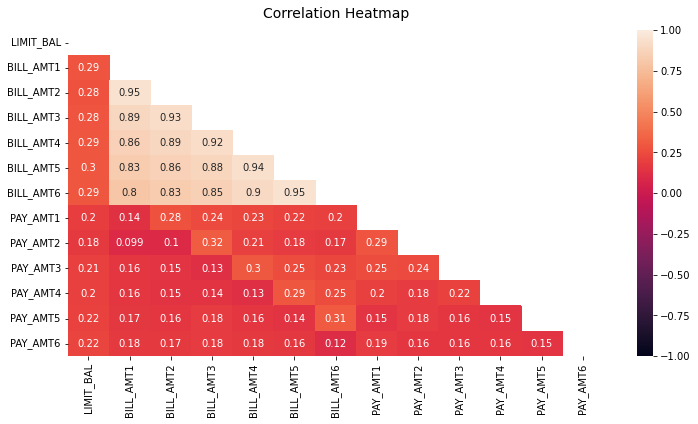

In [ ]:
import seaborn as sns 

plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(num_values.corr(), dtype=np.bool))
heatmap=sns.heatmap(num_values.corr(), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

For the time series variales (BILL_AMT1-BILL_AMT6 and PAY_AMT1-PAY_AMT6) the correlation seems to decrease with distance between months. In general, besides the billing amount variables, the level of correlation is acceptale.

In [ ]:
bill_amt=data[["BILL_AMT1","BILL_AMT2", "BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]]
pmt_amt=data[["PAY_AMT1","PAY_AMT2", "PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]

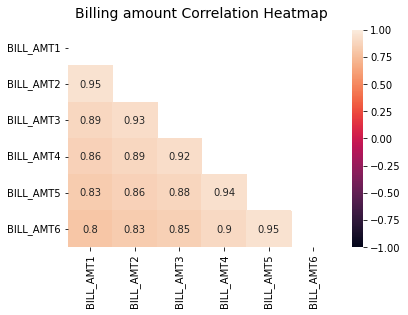

In [ ]:
mask = np.triu(np.ones_like(bill_amt.corr(), dtype=np.bool))
heatmap=sns.heatmap(bill_amt.corr(), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Billing amount Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Due to the very high correlations, I decided to apply PCA to the billing amount variables.

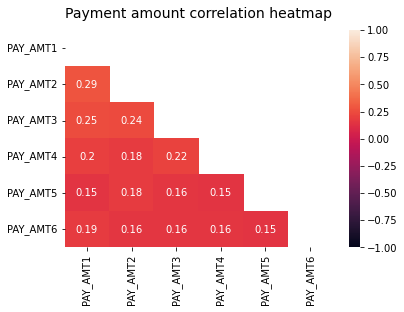

In [ ]:
mask = np.triu(np.ones_like(pmt_amt.corr(), dtype=np.bool))
heatmap=sns.heatmap(pmt_amt.corr(), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Payment amount correlation heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
data["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [ ]:
data["default.payment.next.month"].value_counts(normalize=True) 

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

There classes in the target variale seem well balanced. There does not seem to be any need for undersampling nor oversampling.

In [ ]:
cat_values.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

Because the repayment status is a strong indicator of the risk of default (like the DPD-Days Past Due), I will check the average re-payment status per default flag. 

In [ ]:
# compare average repayment status during time. 
pd.pivot_table(data, index = 'default.payment.next.month', values = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"])

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
default.payment.next.month,,,,,,
0,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624
1,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116


In [ ]:
pd.pivot_table(data, index = 'default.payment.next.month', values = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"],aggfunc=max)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
default.payment.next.month,,,,,,
0,8,8,8,8,7,7
1,8,7,8,8,8,8


Let us have a quick look at each of the variales. The main assumption we have to check before creating groups using clustering techniques and encoding variables using WOE is that the distriutions for the numeric variables are similar.  

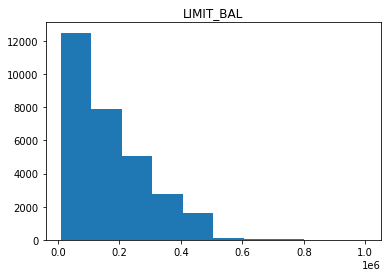

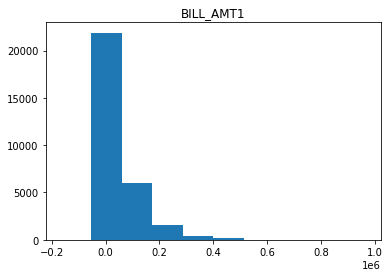

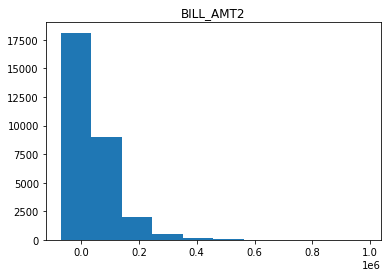

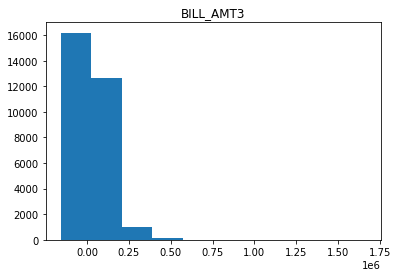

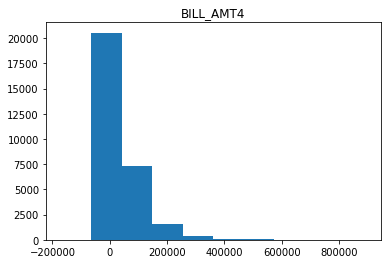

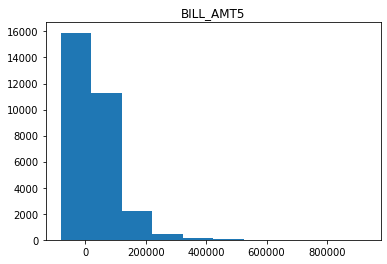

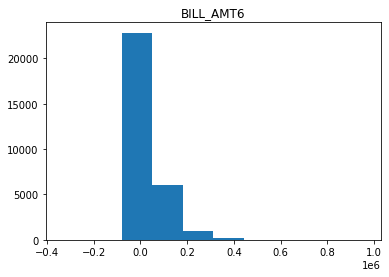

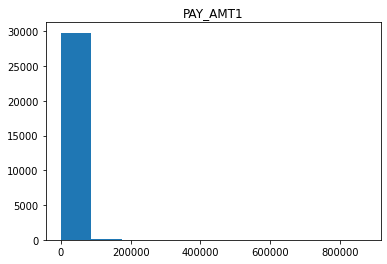

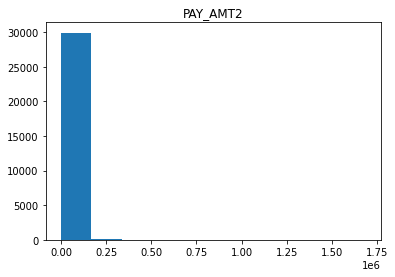

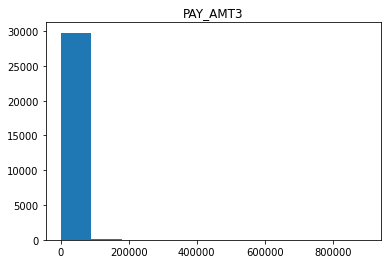

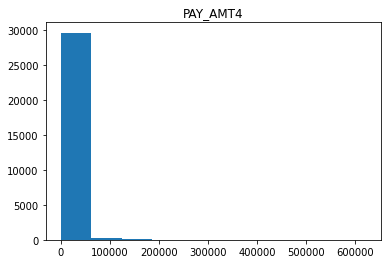

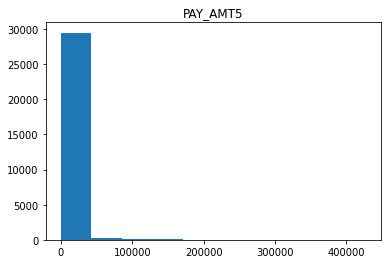

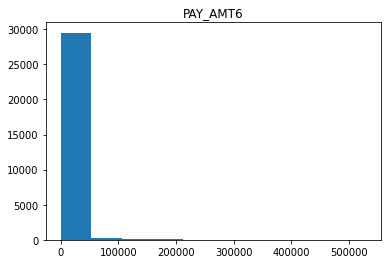

In [ ]:
#distributions for all numeric variables 

for i in num_values.columns:
    plt.hist(num_values[i])
    plt.title(i)
    plt.show()

Because the numeric variables have similar distributions (right skewed), the k-means clustering algorithm should work properly.

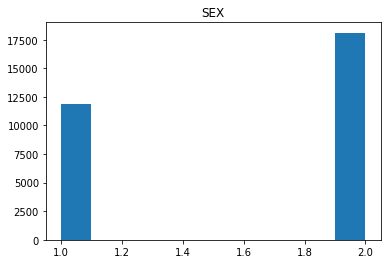

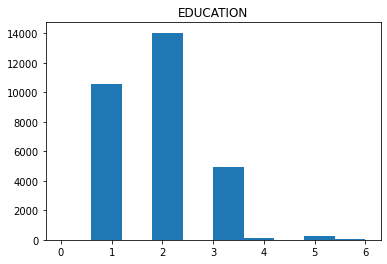

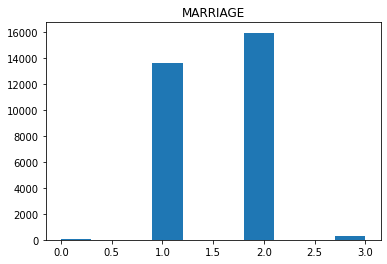

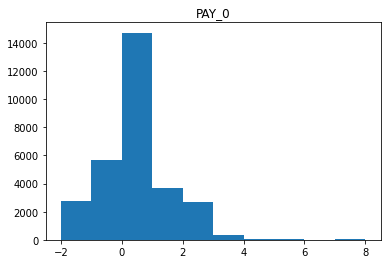

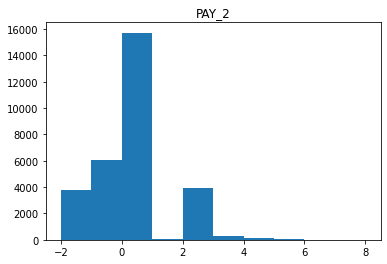

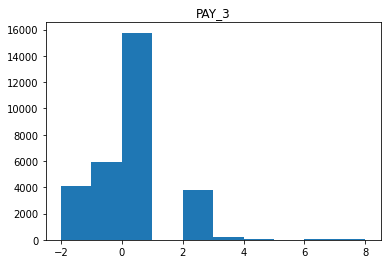

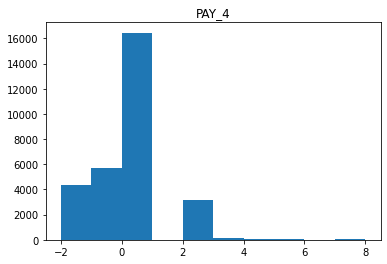

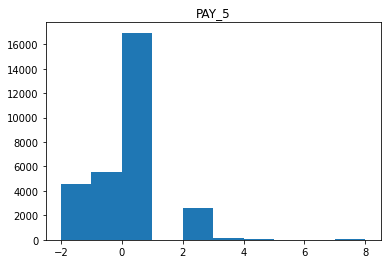

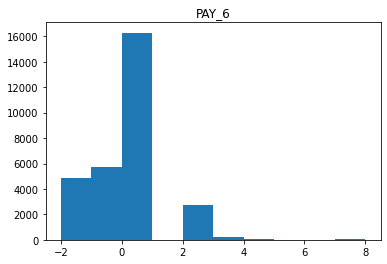

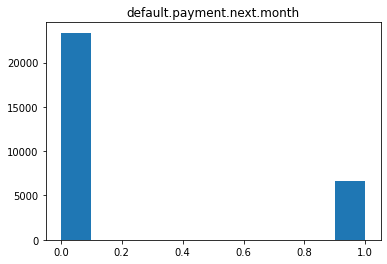

In [ ]:
for i in cat_values.columns:
    plt.hist(cat_values[i])
    plt.title(i)
    plt.show()

The next step in this chapter is to de-correlate the billing amount variables.

In [ ]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

bill_amt=num_values[bill_amt.columns]
PC_BILL_AMT = scale(bill_amt)
pca = decomposition.PCA(n_components=6)
pca.fit(PC_BILL_AMT)

PCA(n_components=6)

In [ ]:
scores = pca.transform(PC_BILL_AMT)
PC_BILL_AMT = pd.DataFrame(scores, columns=['BILL_AMT_PC1', 'BILL_AMT_PC2', 'BILL_AMT_PC3','BILL_AMT_PC4','BILL_AMT_PC5','BILL_AMT_PC6'])
PC_BILL_AMT.head()

,BILL_AMT_PC1,BILL_AMT_PC2,BILL_AMT_PC3,BILL_AMT_PC4,BILL_AMT_PC5,BILL_AMT_PC6
0,-1.611148,0.012479,-0.004384,-0.001924,-0.010671,-0.002399
1,-1.547595,-0.062344,0.017298,-0.004766,0.001198,0.003770
2,-1.035874,0.011256,-0.099726,-0.042742,0.093141,0.043125
3,-0.250712,0.174374,0.029402,0.147442,-0.026127,0.037328
4,-0.968951,-0.213032,0.255236,0.135185,0.105270,0.085009


In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.90555253, 0.0509867 , 0.01860826, 0.01119301, 0.00693446,
       0.00672504])

Because the first feature accounts for more than 90% of the variability, I decided to drop the rest of the features (BILL_AMT_PC2, BILL_AMT_PC3, BILL_AMT_PC4, BILL_AMT_PC5 and BILL_AMT_PC6).

In [ ]:
PC_BILL_AMT.drop(['BILL_AMT_PC2','BILL_AMT_PC3','BILL_AMT_PC4','BILL_AMT_PC5','BILL_AMT_PC6'],axis=1,inplace=True)
num_values.drop(["BILL_AMT1","BILL_AMT2", "BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],axis=1,inplace=True)
num_values = pd.concat([num_values,PC_BILL_AMT],axis=1)
num_values.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT_PC1
0,20000.0,0.0,689.0,0.0,0.0,0.0,0.0,-1.611148
1,120000.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,-1.547595
2,90000.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,-1.035874
3,50000.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,-0.250712
4,50000.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,-0.968951


Let us now check the correlation matrix after the principal components extraction and the dimensionality reduction.

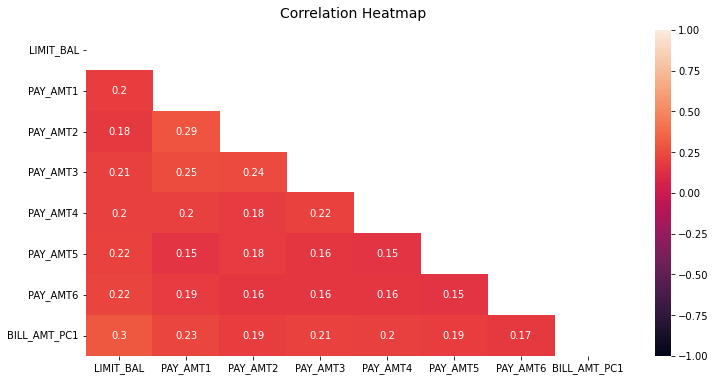

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(num_values.corr(), dtype=np.bool))
heatmap=sns.heatmap(num_values.corr(), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Because the features are highly skewed, I tried to make it slightly more normal using a Yeo-Johnson transformation. This should improve the performance of the predictive models.

The Yeo-Johnson transformationmis is an extension of Box-Cox transformation that can handle both positive and negative values. 

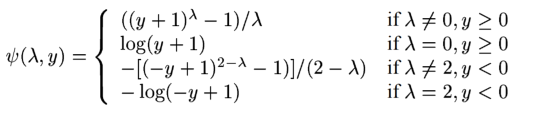

In [ ]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
num_values_yj = power.fit_transform(num_values)
num_values_yj=pd.DataFrame(num_values_yj,columns=num_values.columns)

cat_values_2=cat_values.drop('default.payment.next.month',axis=1,inplace=False)
cat_values_yj = power.fit_transform(cat_values_2)
cat_values_yj=pd.DataFrame(cat_values_yj,columns=cat_values_2.columns)
num_values_yj.head()

,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT_PC1
0,-1.665383,-1.724472,-0.347889,-1.629996,-1.578070,-1.556978,-1.515825,-1.176611
1,-0.090364,-1.724472,-0.202757,-0.080144,0.009080,-1.556978,0.332020,-1.074480
2,-0.396704,-0.064485,-0.031718,-0.080144,0.009080,0.018806,0.741487,-0.344963
3,-0.953920,0.063555,0.102920,-0.006222,0.046787,0.044891,0.059121,0.454205
4,-0.953920,0.063555,1.948535,1.066641,1.057406,-0.121440,-0.080835,-0.261753


In [ ]:
num_values_yj.shape

(30000, 8)

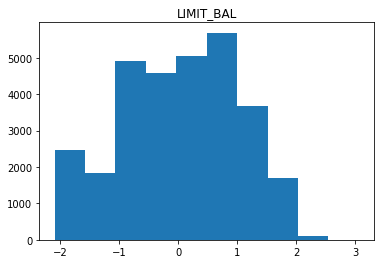

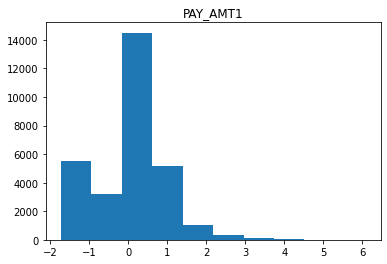

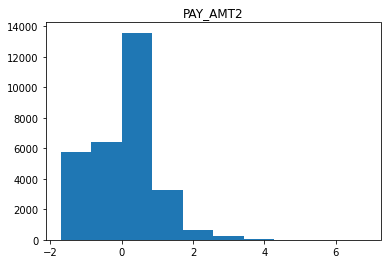

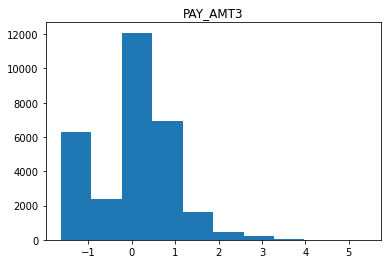

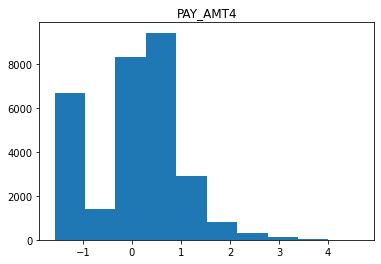

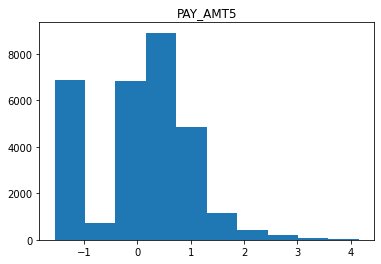

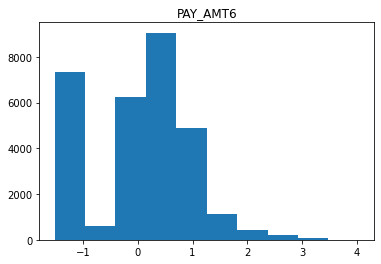

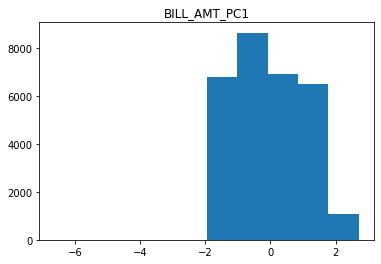

In [ ]:
#distributions for the transformed numeric variables 

for i in num_values_yj.columns:
    plt.hist(num_values_yj[i])
    plt.title(i)
    plt.show()

Even though still ar away from normally distributed, the numerical data looks less skewed than before.

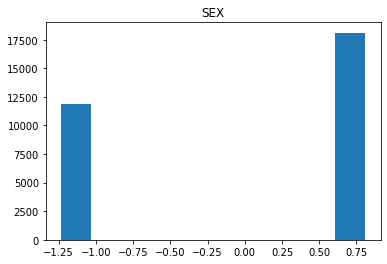

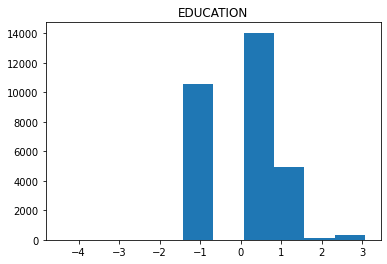

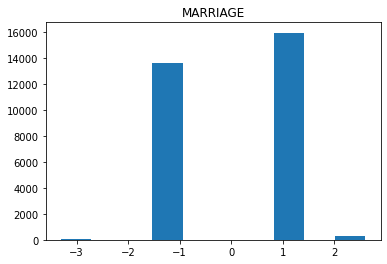

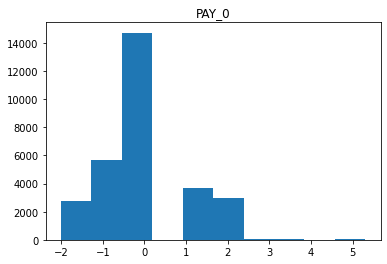

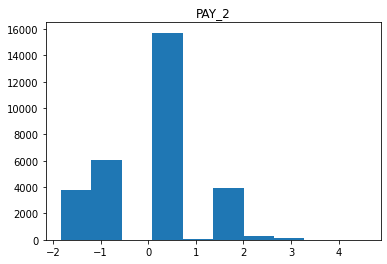

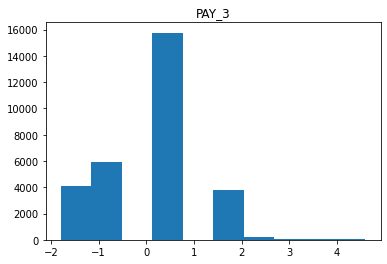

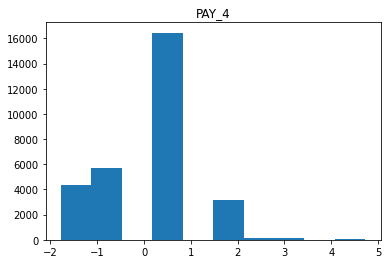

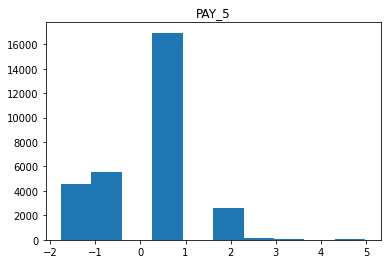

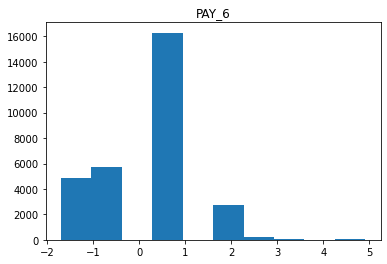

In [ ]:
#distributions for the transformed categorical variables 

for i in cat_values_yj.columns:
    plt.hist(cat_values_yj[i])
    plt.title(i)
    plt.show()

The categorical variables with more than two levels look more normally distributed.

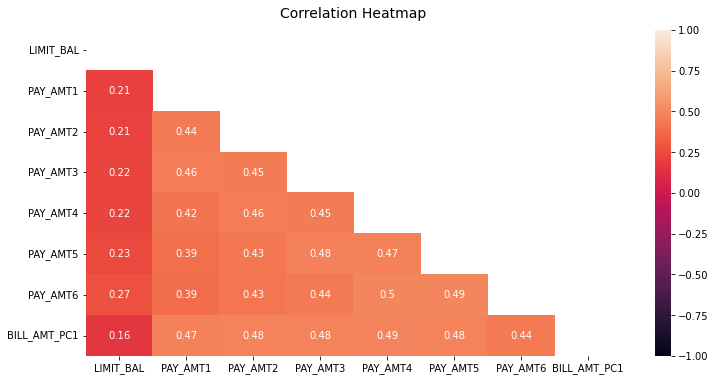

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(num_values_yj.corr(), dtype=np.bool))
heatmap=sns.heatmap(num_values_yj.corr(), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The levels of correlation are still acceptable.

## Feature Engineering (Clustering and Validating Clusters)

First I will create the group values via clustering. Afterwards, I will encode the group variables using WOE encoding. In order to successfully create the clusters, I will follow the following steps:
* Detect and treat outliers
* Standardize the values
* Create clusters using k-means clustering, tune and validate the clusters using the reval package

### Outlier detection and treatment

I used an [adjusted Tukey fence](https://www.researchgate.net/publication/265731183_A_generalized_boxplot_for_skewed_and_heavy-tailed_distributions) to account for the skewness in the distribution of each of the variables together with winsorizing.

In [ ]:
# import numpy and statsmodels
import numpy as np
from statsmodels.stats.stattools import medcouple
import math

col_names=list(num_values_yj.columns)
display(col_names)
for i in col_names:
 q1, q2, q3 = num_values_yj[i].quantile([0.25,0.5,0.75])
 MC=medcouple(num_values_yj[i])
 IQR =q3-q1
 lower_cap=q1-1.5*math.exp(-3.5*MC)*IQR
 upper_cap=q3+1.5*math.exp(4*MC)*IQR
 num_values_yj[i]=num_values_yj[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['LIMIT_BAL',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'BILL_AMT_PC1']

#### Feature standardization

In [ ]:
##Scale the data
from scipy.stats import zscore
num_values_z = num_values_yj.apply(zscore)
num_values_z.head()

,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT_PC1
0,-1.665730,-1.720813,-0.343905,-1.731693,-1.664448,-1.639955,-1.596246,-1.178003
1,-0.090280,-1.720813,-0.189723,-0.039427,0.054072,-1.639955,0.405702,-1.075772
2,-0.396704,-0.101821,-0.008019,-0.039427,0.054072,0.064713,0.849316,-0.345540
3,-0.954072,0.046526,0.135014,0.041288,0.094900,0.092932,0.110044,0.454413
4,-0.954072,0.046526,1.794830,1.212735,1.189169,-0.087004,-0.041583,-0.262248


## Train-Test Split 

The stability based clustering algorithm I shall introduce requires splitting the data into training and test datasets and making use of the target variale.

In [ ]:
from sklearn.model_selection import train_test_split

x_data = pd.concat([cat_values_yj,num_values_z.LIMIT_BAL,num_values_z.BILL_AMT_PC1,num_values_z.PAY_AMT1,num_values_z.PAY_AMT2,num_values_z.PAY_AMT3,num_values_z.PAY_AMT4,num_values_z.PAY_AMT5,num_values_z.PAY_AMT6],axis=1)

y_data = data[['default.payment.next.month']]

x_train, x_test,y_train, y_test = train_test_split(x_data,y_data, random_state=24, test_size=0.3)

print(x_data.shape)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(30000, 17)
(21000, 17) (9000, 17)
(21000, 1) (9000, 1)


### Clustering and validating the clusters 

In this part, I used k-means clusteing to create groups for each of the features. I tuned the algorithm using the reval Python package such that I get no more than 7 groups per variable (given that I need to have enough defaults per group). I visualised the clusters using the silhouette plot and make sure that for the optimum solution produced by the reval algorithm there are no observations with negative silhouette scores, the clusters go through the average silhouette score. All proposed solutions fulill these conditions. Beause every average silhouette score is greater than 0.5, the clusters are well separated.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
* 1: clusters are well separated from each other and clearly distinguished.
* 0: the distance between clusters is not significant.
* -1: the clusters are wrongly assigned.

The formula or the silhouette score can be found below:

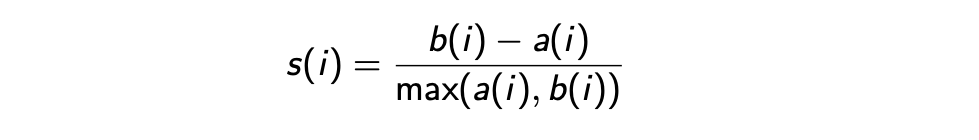

where
* a = the average intra-cluster distance (i.e the average distance between each point within a cluster).
* b = the average inter-cluster distance (i.e the average distance between all clusters).

reval is a Python package for stability-based relative clustering validation. It works with multiple clustering and classification algorithms, and as such, it enables the selection of best clustering solutions as the ones that replicate, via supervised learning, on unseen subsets of data. It is a tool that provides measures to evaluate clustering replicability and implements the automation of the labeling process. reval can be used as a complement or an alternative to internal validation measures, which highly rely on features inherent to a specific grouping solution, hindering the validation of replicable clusters. More information can e found [here](https://www.sciencedirect.com/science/article/pii/S2666389921000428).

In [ ]:
x_tr_LIMIT_BAL=x_train["LIMIT_BAL"].values.reshape(-1, 1)
x_tr_BILL_AMT_PC1=x_train["BILL_AMT_PC1"].values.reshape(-1, 1)
x_tr_PAY_AMT1=x_train["PAY_AMT1"].values.reshape(-1, 1)
x_tr_PAY_AMT2=x_train["PAY_AMT2"].values.reshape(-1, 1)
x_tr_PAY_AMT3=x_train["PAY_AMT3"].values.reshape(-1, 1)
x_tr_PAY_AMT4=x_train["PAY_AMT4"].values.reshape(-1, 1)
x_tr_PAY_AMT5=x_train["PAY_AMT5"].values.reshape(-1, 1)
x_tr_PAY_AMT6=x_train["PAY_AMT6"].values.reshape(-1, 1)

In [ ]:
x_ts_LIMIT_BAL=x_test["LIMIT_BAL"].values.reshape(-1, 1)
x_ts_BILL_AMT_PC1=x_test["BILL_AMT_PC1"].values.reshape(-1, 1)
x_ts_PAY_AMT1=x_test["PAY_AMT1"].values.reshape(-1, 1)
x_ts_PAY_AMT2=x_test["PAY_AMT2"].values.reshape(-1, 1)
x_ts_PAY_AMT3=x_test["PAY_AMT3"].values.reshape(-1, 1)
x_ts_PAY_AMT4=x_test["PAY_AMT4"].values.reshape(-1, 1)
x_ts_PAY_AMT5=x_test["PAY_AMT5"].values.reshape(-1, 1)
x_ts_PAY_AMT6=x_test["PAY_AMT6"].values.reshape(-1, 1)

In [ ]:
import reval
from sklearn.linear_model import LogisticRegression
from reval.best_nclust_cv import FindBestClustCV
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In order to tune the reval algorithm, I used k-means clustering together with logistic regression. 

### Cluster analysis for the LIMIT_BAL variable

In [ ]:
classifier = LogisticRegression(max_iter = 1000)
clustering = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=24)
findbestclust = FindBestClustCV(nfold=2,
                                nclust_range=list(range(2, 8)),
                                s=classifier,
                                c=clustering,
                                nrand=100)
metrics, nbest = findbestclust.best_nclust(x_tr_LIMIT_BAL, iter_cv=5, strat_vect=y_train)
out = findbestclust.evaluate(x_tr_LIMIT_BAL, x_ts_LIMIT_BAL, nbest)

In [ ]:
x_tr_LIMIT_BAL_grp=out.train_cllab
x_ts_LIMIT_BAL_grp=out.test_cllab
nbest

4

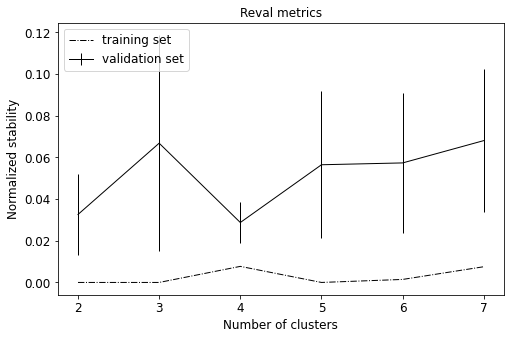

In [ ]:
from reval.visualization import plot_metrics
plot_metrics(metrics, title="Reval metrics")

For n_clusters = 2 The average silhouette_score is : 0.6146050279465443
For n_clusters = 3 The average silhouette_score is : 0.5646566515431345
For n_clusters = 4 The average silhouette_score is : 0.5890143710603668
For n_clusters = 5 The average silhouette_score is : 0.5845015695692009
For n_clusters = 6 The average silhouette_score is : 0.5833234606429502
For n_clusters = 7 The average silhouette_score is : 0.6061433104624315


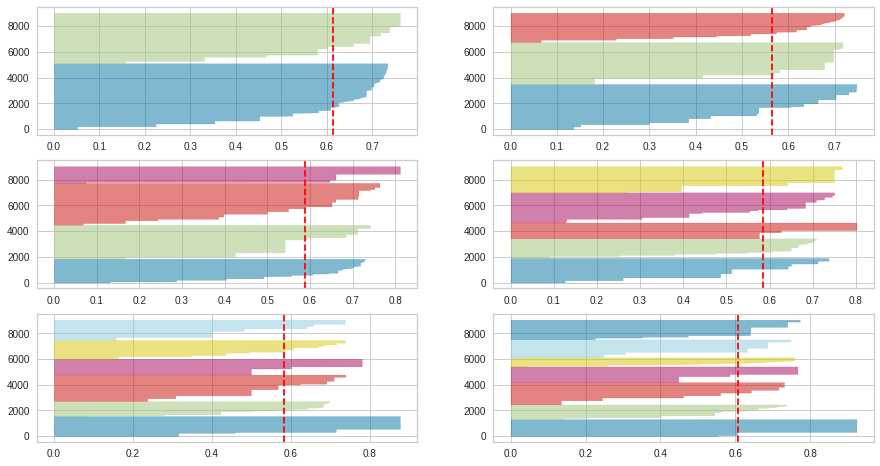

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

X=x_ts_LIMIT_BAL.reshape(-1, 1)
 
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3,4,5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=24)
    q, mod = divmod(i, 2)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

### Cluster analysis for the BILL_AMT_PC1 variable

In [ ]:
classifier = LogisticRegression(max_iter = 1000)
clustering = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=24)
findbestclust = FindBestClustCV(nfold=2,
                                nclust_range=list(range(2, 8)),
                                s=classifier,
                                c=clustering,
                                nrand=100)
metrics, nbest = findbestclust.best_nclust(x_tr_BILL_AMT_PC1, iter_cv=5, strat_vect=y_train)
out = findbestclust.evaluate(x_tr_BILL_AMT_PC1, x_ts_BILL_AMT_PC1, nbest)

In [ ]:
x_tr_BILL_AMT_PC1_grp=out.train_cllab
x_ts_BILL_AMT_PC1_grp=out.test_cllab
nbest

2

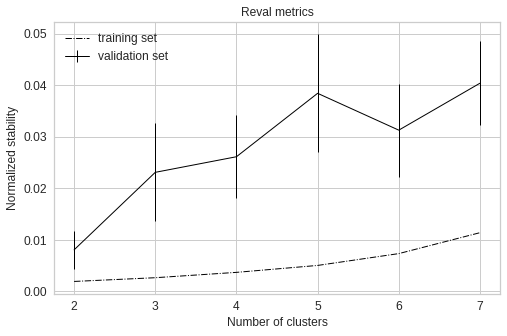

In [ ]:
from reval.visualization import plot_metrics
plot_metrics(metrics, title="Reval metrics")

For n_clusters = 2 The average silhouette_score is : 0.6609529288776935
For n_clusters = 3 The average silhouette_score is : 0.6226526436557952
For n_clusters = 4 The average silhouette_score is : 0.6028186450702516
For n_clusters = 5 The average silhouette_score is : 0.5870941999528495
For n_clusters = 6 The average silhouette_score is : 0.577325816115724
For n_clusters = 7 The average silhouette_score is : 0.5820657251581124


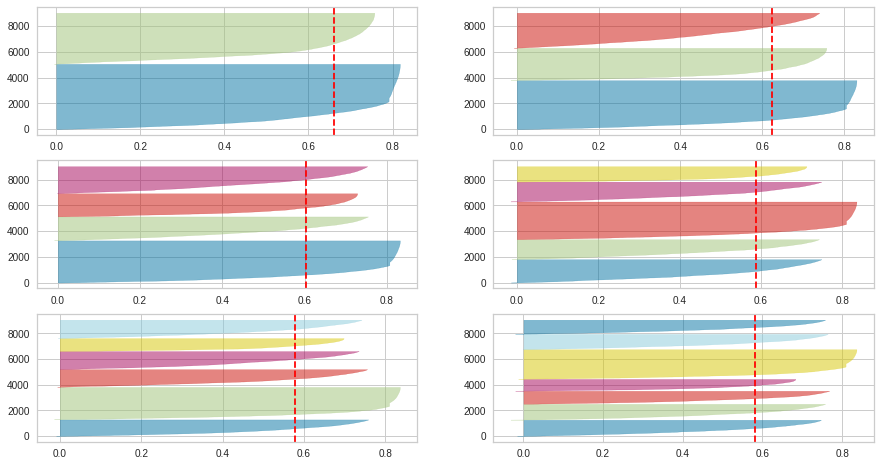

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

X=x_ts_BILL_AMT_PC1.reshape(-1, 1)
 
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3,4,5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=24)
    q, mod = divmod(i, 2)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

### Cluster analysis for the PAY_AMT1 variable

In [ ]:
classifier = LogisticRegression(max_iter = 1000)
clustering = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=24)
findbestclust = FindBestClustCV(nfold=2,
                                nclust_range=list(range(2, 8)),
                                s=classifier,
                                c=clustering,
                                nrand=100)
metrics, nbest = findbestclust.best_nclust(x_tr_PAY_AMT1, iter_cv=5, strat_vect=y_train)
out = findbestclust.evaluate(x_tr_PAY_AMT1, x_ts_PAY_AMT1, nbest)

In [ ]:
x_tr_PAY_AMT1_grp=out.train_cllab
x_ts_PAY_AMT1_grp=out.test_cllab
nbest

2

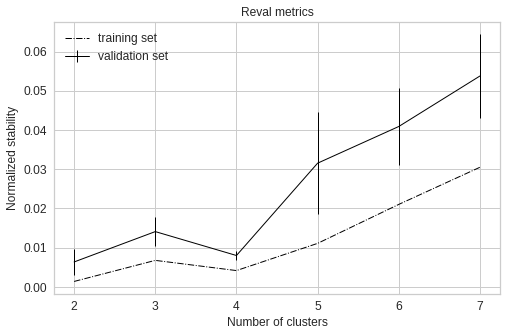

In [ ]:
plot_metrics(metrics, title="Reval metrics")

For n_clusters = 2 The average silhouette_score is : 0.6854454774352883
For n_clusters = 3 The average silhouette_score is : 0.6439540184928175
For n_clusters = 4 The average silhouette_score is : 0.6311441012373827
For n_clusters = 5 The average silhouette_score is : 0.6189190705288162
For n_clusters = 6 The average silhouette_score is : 0.6538945210675847
For n_clusters = 7 The average silhouette_score is : 0.6540198222378683


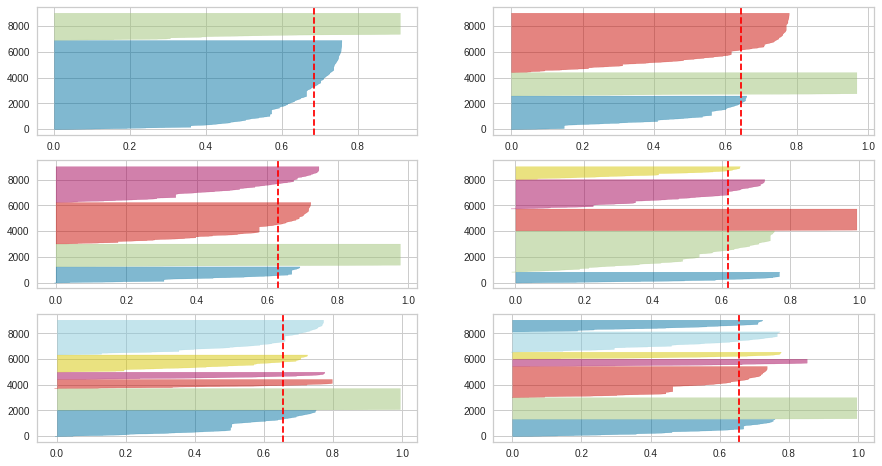

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

X=x_ts_PAY_AMT1.reshape(-1, 1)
 
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3,4,5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=24)
    q, mod = divmod(i, 2)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

### Cluster analysis for the PAY_AMT2 variable

In [ ]:
classifier = LogisticRegression(max_iter = 1000)
clustering = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=24)
findbestclust = FindBestClustCV(nfold=2,
                                nclust_range=list(range(2, 8)),
                                s=classifier,
                                c=clustering,
                                nrand=100)
metrics, nbest = findbestclust.best_nclust(x_tr_PAY_AMT2, iter_cv=5, strat_vect=y_train)
out = findbestclust.evaluate(x_tr_PAY_AMT2, x_ts_PAY_AMT2, nbest)

In [ ]:
x_tr_PAY_AMT2_grp=out.train_cllab
x_ts_PAY_AMT2_grp=out.test_cllab
nbest

3

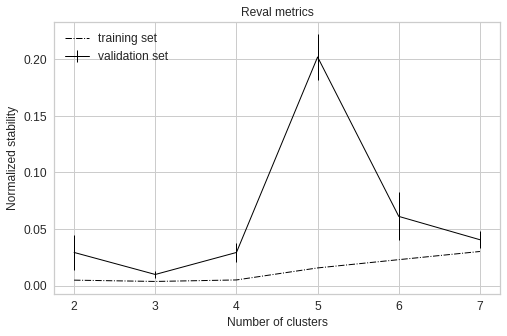

In [ ]:
plot_metrics(metrics, title="Reval metrics")

For n_clusters = 2 The average silhouette_score is : 0.7391974115632333
For n_clusters = 3 The average silhouette_score is : 0.653971331894073
For n_clusters = 4 The average silhouette_score is : 0.6335581858891366
For n_clusters = 5 The average silhouette_score is : 0.6136437431006635
For n_clusters = 6 The average silhouette_score is : 0.6467358405916328
For n_clusters = 7 The average silhouette_score is : 0.644874908145866


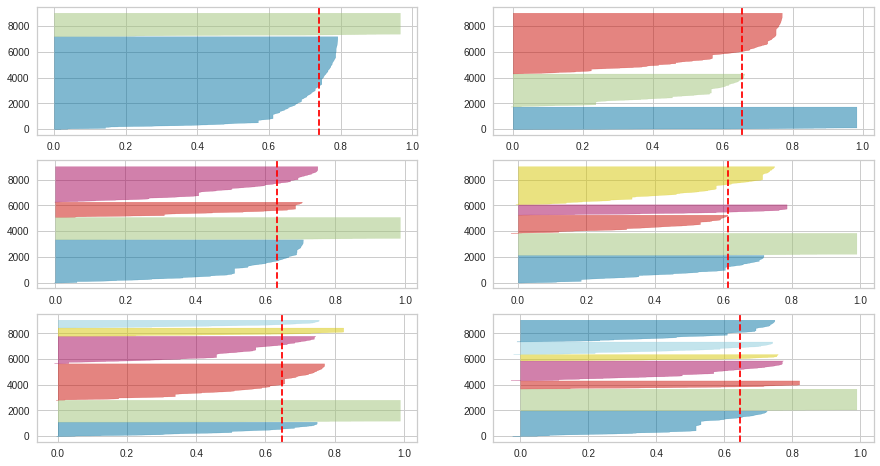

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

X=x_ts_PAY_AMT2.reshape(-1, 1)
 
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3,4,5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=24)
    q, mod = divmod(i, 2)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

### Cluster analysis for the PAY_AMT3 variable

In [ ]:
classifier = LogisticRegression(max_iter = 1000)
clustering = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=24)
findbestclust = FindBestClustCV(nfold=2,
                                nclust_range=list(range(2, 8)),
                                s=classifier,
                                c=clustering,
                                nrand=100)
metrics, nbest = findbestclust.best_nclust(x_tr_PAY_AMT3, iter_cv=5, strat_vect=y_train)
out = findbestclust.evaluate(x_tr_PAY_AMT3, x_ts_PAY_AMT3, nbest)

In [ ]:
x_tr_PAY_AMT3_grp=out.train_cllab
x_ts_PAY_AMT3_grp=out.test_cllab
nbest

4

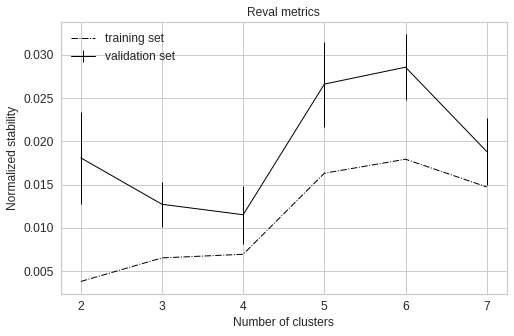

In [ ]:
plot_metrics(metrics, title="Reval metrics")

For n_clusters = 2 The average silhouette_score is : 0.7487306296132716
For n_clusters = 3 The average silhouette_score is : 0.666551150793182
For n_clusters = 4 The average silhouette_score is : 0.6429589120735114
For n_clusters = 5 The average silhouette_score is : 0.6538589887113325
For n_clusters = 6 The average silhouette_score is : 0.6674947543827364
For n_clusters = 7 The average silhouette_score is : 0.6689700465481735


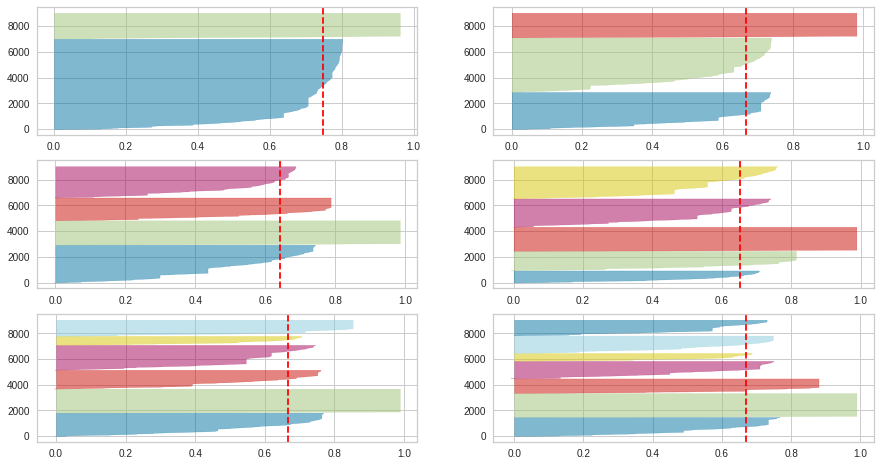

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

X=x_ts_PAY_AMT3.reshape(-1, 1)
 
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3,4,5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=24)
    q, mod = divmod(i, 2)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

### Cluster analysis for the PAY_AMT4 variable

In [ ]:
classifier = LogisticRegression(max_iter = 1000)
clustering = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=24)
findbestclust = FindBestClustCV(nfold=2,
                                nclust_range=list(range(2, 8)),
                                s=classifier,
                                c=clustering,
                                nrand=100)
metrics, nbest = findbestclust.best_nclust(x_tr_PAY_AMT4, iter_cv=5, strat_vect=y_train)
out = findbestclust.evaluate(x_tr_PAY_AMT4, x_ts_PAY_AMT4, nbest)

In [ ]:
x_tr_PAY_AMT4_grp=out.train_cllab
x_ts_PAY_AMT4_grp=out.test_cllab
nbest

3

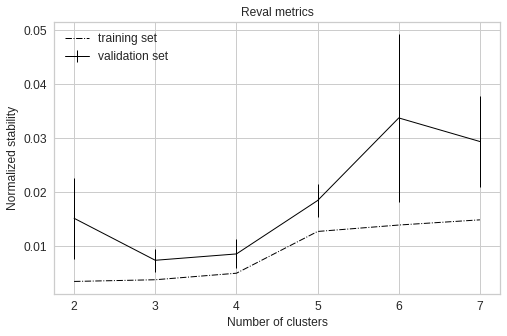

In [ ]:
plot_metrics(metrics, title="Reval metrics")

For n_clusters = 2 The average silhouette_score is : 0.7471944841000493
For n_clusters = 3 The average silhouette_score is : 0.66753551473816
For n_clusters = 4 The average silhouette_score is : 0.6555173349253174
For n_clusters = 5 The average silhouette_score is : 0.6586521064116233
For n_clusters = 6 The average silhouette_score is : 0.67742224768388
For n_clusters = 7 The average silhouette_score is : 0.6784958924430299


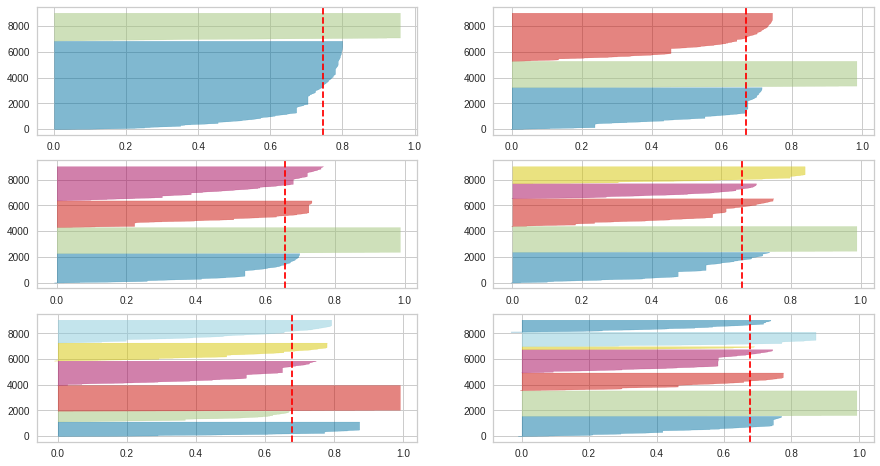

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

X=x_ts_PAY_AMT4.reshape(-1, 1)
 
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3,4,5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=24)
    q, mod = divmod(i, 2)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

### Cluster analysis for the PAY_AMT5 variable

In [ ]:
classifier = LogisticRegression(max_iter = 1000)
clustering = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=24)
findbestclust = FindBestClustCV(nfold=2,
                                nclust_range=list(range(2, 8)),
                                s=classifier,
                                c=clustering,
                                nrand=100)
metrics, nbest = findbestclust.best_nclust(x_tr_PAY_AMT5, iter_cv=5, strat_vect=y_train)
out = findbestclust.evaluate(x_tr_PAY_AMT5, x_ts_PAY_AMT5, nbest)

In [ ]:
x_tr_PAY_AMT5_grp=out.train_cllab
x_ts_PAY_AMT5_grp=out.test_cllab
nbest

4

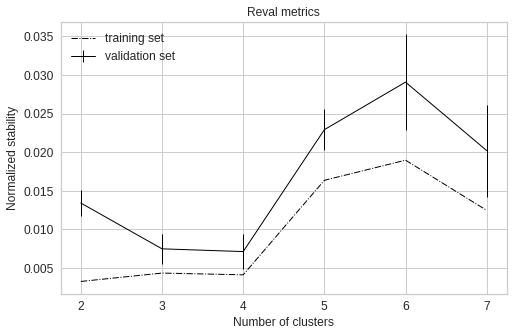

In [ ]:
plot_metrics(metrics, title="Reval metrics")

For n_clusters = 2 The average silhouette_score is : 0.7575616265958875
For n_clusters = 3 The average silhouette_score is : 0.6748663100919258
For n_clusters = 4 The average silhouette_score is : 0.6566697162515468
For n_clusters = 5 The average silhouette_score is : 0.6671165479075553
For n_clusters = 6 The average silhouette_score is : 0.6859445539236737
For n_clusters = 7 The average silhouette_score is : 0.6934686131581204


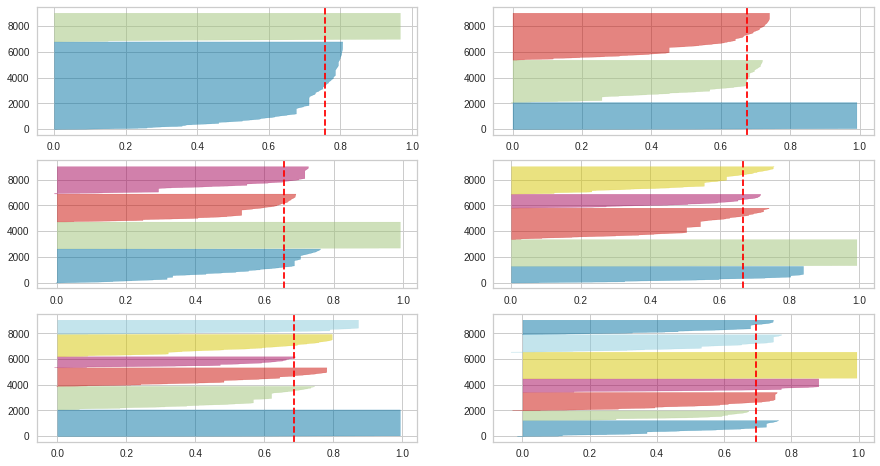

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

X=x_ts_PAY_AMT5.reshape(-1, 1)
 
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3,4,5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=24)
    q, mod = divmod(i, 2)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

### Cluster analysis for the PAY_AMT6 variable

In [ ]:
classifier = LogisticRegression(max_iter = 1000)
clustering = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=24)
findbestclust = FindBestClustCV(nfold=2,
                                nclust_range=list(range(2, 8)),
                                s=classifier,
                                c=clustering,
                                nrand=100)
metrics, nbest = findbestclust.best_nclust(x_tr_PAY_AMT6, iter_cv=5, strat_vect=y_train)
out = findbestclust.evaluate(x_tr_PAY_AMT6, x_ts_PAY_AMT6, nbest)

In [ ]:
x_tr_PAY_AMT6_grp=out.train_cllab
x_ts_PAY_AMT6_grp=out.test_cllab
nbest

3

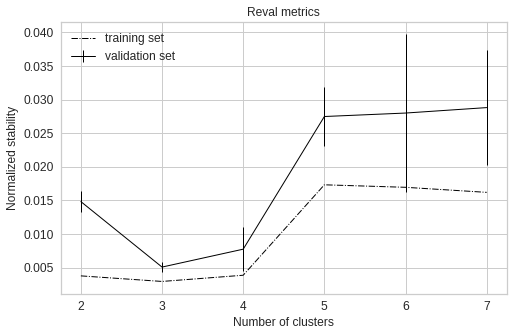

In [ ]:
plot_metrics(metrics, title="Reval metrics")

For n_clusters = 2 The average silhouette_score is : 0.7723425820058174
For n_clusters = 3 The average silhouette_score is : 0.6801285470102467
For n_clusters = 4 The average silhouette_score is : 0.6666458333476969
For n_clusters = 5 The average silhouette_score is : 0.6769473732582996
For n_clusters = 6 The average silhouette_score is : 0.6943517823521901
For n_clusters = 7 The average silhouette_score is : 0.700609910023292


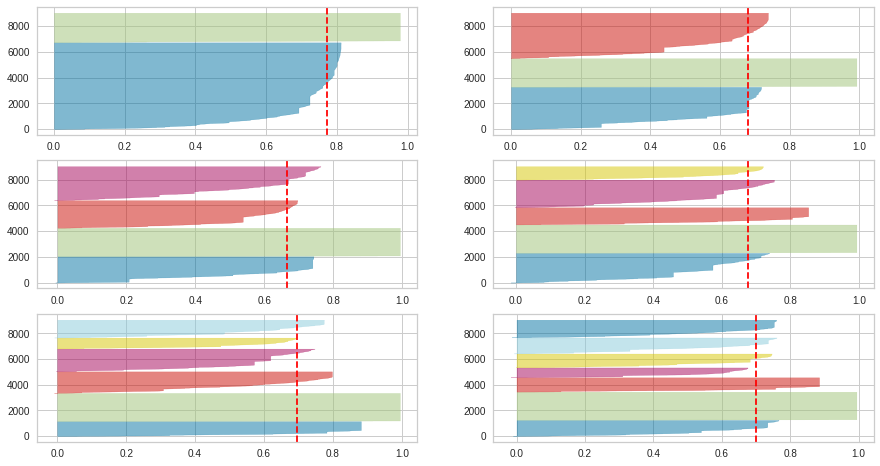

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

X=x_ts_PAY_AMT6.reshape(-1, 1)
 
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3,4,5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=24)
    q, mod = divmod(i, 2)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

## WOE (Weight of Evidence) Encoding

In [ ]:
x_train_cat=x_train[["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].reset_index(drop=True, inplace=False)
x_test_cat=x_test[["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].reset_index(drop=True, inplace=False)

y_train.reset_index(drop=True, inplace=True)
x_tr_LIMIT_BAL_group=pd.DataFrame(x_tr_LIMIT_BAL_grp,columns=["LIMIT_BAL_grp"]).reset_index(drop=True, inplace=False)
x_ts_LIMIT_BAL_group=pd.DataFrame(x_ts_LIMIT_BAL_grp,columns=["LIMIT_BAL_grp"]).reset_index(drop=True, inplace=False)
x_tr_BILL_AMT_PC1_group=pd.DataFrame(x_tr_BILL_AMT_PC1_grp,columns=["BILL_AMT_PC1_grp"]).reset_index(drop=True, inplace=False)
x_ts_BILL_AMT_PC1_group=pd.DataFrame(x_ts_BILL_AMT_PC1_grp,columns=["BILL_AMT_PC1_grp"]).reset_index(drop=True, inplace=False)
x_tr_PAY_AMT1_group=pd.DataFrame(x_tr_PAY_AMT1_grp,columns=["PAY_AMT1_grp"]).reset_index(drop=True, inplace=False)
x_ts_PAY_AMT1_group=pd.DataFrame(x_ts_PAY_AMT1_grp,columns=["PAY_AMT1_grp"]).reset_index(drop=True, inplace=False)
x_tr_PAY_AMT2_group=pd.DataFrame(x_tr_PAY_AMT2_grp,columns=["PAY_AMT2_grp"]).reset_index(drop=True, inplace=False)
x_ts_PAY_AMT2_group=pd.DataFrame(x_ts_PAY_AMT2_grp,columns=["PAY_AMT2_grp"]).reset_index(drop=True, inplace=False)
x_tr_PAY_AMT3_group=pd.DataFrame(x_tr_PAY_AMT3_grp,columns=["PAY_AMT3_grp"]).reset_index(drop=True, inplace=False)
x_ts_PAY_AMT3_group=pd.DataFrame(x_ts_PAY_AMT3_grp,columns=["PAY_AMT3_grp"]).reset_index(drop=True, inplace=False)
x_tr_PAY_AMT4_group=pd.DataFrame(x_tr_PAY_AMT4_grp,columns=["PAY_AMT4_grp"]).reset_index(drop=True, inplace=False)
x_ts_PAY_AMT4_group=pd.DataFrame(x_ts_PAY_AMT4_grp,columns=["PAY_AMT4_grp"]).reset_index(drop=True, inplace=False)
x_tr_PAY_AMT5_group=pd.DataFrame(x_tr_PAY_AMT5_grp,columns=["PAY_AMT5_grp"]).reset_index(drop=True, inplace=False)
x_ts_PAY_AMT5_group=pd.DataFrame(x_ts_PAY_AMT5_grp,columns=["PAY_AMT5_grp"]).reset_index(drop=True, inplace=False)
x_tr_PAY_AMT6_group=pd.DataFrame(x_tr_PAY_AMT6_grp,columns=["PAY_AMT6_grp"]).reset_index(drop=True, inplace=False)
x_ts_PAY_AMT6_group=pd.DataFrame(x_ts_PAY_AMT6_grp,columns=["PAY_AMT6_grp"]).reset_index(drop=True, inplace=False)
x_train_grp=pd.concat([x_train_cat,x_tr_LIMIT_BAL_group,x_tr_BILL_AMT_PC1_group,x_tr_PAY_AMT1_group,x_tr_PAY_AMT2_group,x_tr_PAY_AMT3_group,x_tr_PAY_AMT4_group,x_tr_PAY_AMT5_group,x_tr_PAY_AMT6_group],axis=1)
x_test_grp=pd.concat([x_test_cat,x_ts_LIMIT_BAL_group,x_ts_BILL_AMT_PC1_group,x_ts_PAY_AMT1_group,x_ts_PAY_AMT2_group,x_ts_PAY_AMT3_group,x_ts_PAY_AMT4_group,x_ts_PAY_AMT5_group,x_ts_PAY_AMT6_group],axis=1)

In [ ]:
#!pip install category_encoders
import category_encoders as ce
columns = [col for col in x_train_grp.columns]
woe_encoder = ce.WOEEncoder(cols=columns).fit(x_train_grp[columns], y_train)

# Encoding training data
woe_X_train = woe_encoder.transform(x_train_grp[columns], y_train).add_suffix('_woe')
X_train_woe_v0 = x_train_grp.join(woe_X_train)

woe_encoded_cols = woe_X_train.columns

pd.set_option('display.max_columns',100)  

x_train_woe=X_train_woe_v0.filter(regex='_woe$',axis=1)
x_train_woe.head(15)

,SEX_woe,EDUCATION_woe,MARRIAGE_woe,PAY_0_woe,PAY_2_woe,PAY_3_woe,PAY_4_woe,PAY_5_woe,PAY_6_woe,LIMIT_BAL_grp_woe,BILL_AMT_PC1_grp_woe,PAY_AMT1_grp_woe,PAY_AMT2_grp_woe,PAY_AMT3_grp_woe,PAY_AMT4_grp_woe,PAY_AMT5_grp_woe,PAY_AMT6_grp_woe
0,-0.080500,-0.179878,0.068374,-0.328903,-0.414425,-0.445683,-0.423807,-0.183576,-0.173759,-0.248298,0.026392,0.529424,0.019866,0.070489,0.426302,0.337112,0.057560
1,-0.080500,0.092843,0.068374,-0.651460,-0.396371,-0.280137,-0.214316,-0.183576,-0.173759,-0.248298,-0.034814,-0.185300,-0.560662,-0.142253,-0.395785,-0.482531,-0.357820
2,-0.080500,0.092843,0.068374,0.584989,-0.414425,-0.445683,-0.423807,-0.398009,-0.340505,-0.248298,0.026392,-0.185300,0.548677,-0.142253,-0.395785,0.337112,0.340213
3,-0.080500,0.092843,0.068374,0.584989,1.485379,-0.280137,-0.214316,-0.183576,-0.173759,0.206369,-0.034814,0.529424,0.019866,0.070489,0.042220,-0.038418,-0.357820
4,0.117219,-0.179878,-0.065108,-0.651460,-0.396371,-0.280137,-0.214316,-0.183576,-0.173759,-0.248298,0.026392,-0.185300,0.019866,-0.142253,0.042220,0.090754,-0.357820
5,0.117219,0.166122,-0.065108,-0.651460,-0.396371,-0.280137,-0.214316,-0.183576,-0.173759,0.206369,-0.034814,-0.185300,0.019866,0.070489,0.042220,0.090754,0.057560
6,0.117219,0.166122,0.068374,-0.651460,-0.396371,-0.280137,-0.214316,-0.183576,-0.173759,-0.547396,-0.034814,-0.185300,0.019866,-0.142253,0.042220,-0.038418,-0.357820
7,-0.080500,-0.179878,0.068374,-0.651460,-0.396371,-0.280137,-0.214316,-0.183576,-0.173759,-0.248298,-0.034814,-0.185300,-0.560662,-0.142253,-0.395785,-0.482531,-0.357820
8,0.117219,0.092843,-0.065108,-0.651460,-0.396371,-0.280137,-0.214316,-0.183576,-0.173759,-0.547396,-0.034814,-0.185300,-0.560662,-0.515076,-0.395785,-0.482531,-0.357820
9,-0.080500,0.092843,-0.065108,-0.651460,-0.396371,1.309234,-0.214316,-0.183576,-0.173759,0.206369,-0.034814,-0.185300,0.548677,-0.142253,0.042220,-0.038418,-0.357820


In [ ]:
# Encoding test data

woe_X_test = woe_encoder.transform(x_test_grp[columns]).add_suffix('_woe')
x_test_woe_v0 = x_test_grp.join(woe_X_test)
x_test_woe=x_test_woe_v0.filter(regex='_woe$',axis=1)

x_test_woe.head(15)

,SEX_woe,EDUCATION_woe,MARRIAGE_woe,PAY_0_woe,PAY_2_woe,PAY_3_woe,PAY_4_woe,PAY_5_woe,PAY_6_woe,LIMIT_BAL_grp_woe,BILL_AMT_PC1_grp_woe,PAY_AMT1_grp_woe,PAY_AMT2_grp_woe,PAY_AMT3_grp_woe,PAY_AMT4_grp_woe,PAY_AMT5_grp_woe,PAY_AMT6_grp_woe
0,-0.080500,-0.179878,0.068374,-0.328903,-0.414425,-0.445683,-0.423807,-0.398009,-0.340505,-0.547396,0.026392,-0.185300,-0.560662,-0.515076,-0.395785,-0.482531,-0.357820
1,0.117219,0.092843,0.286057,2.043560,-0.396371,-0.280137,-0.214316,-0.183576,-0.173759,0.697098,0.026392,-0.185300,0.019866,0.070489,0.042220,-0.038418,0.057560
2,-0.080500,-0.179878,0.068374,-0.591047,-0.221751,-0.212981,-0.423807,-0.183576,-0.173759,-0.248298,0.026392,0.529424,0.548677,-0.515076,0.042220,-0.038418,0.057560
3,-0.080500,0.166122,0.068374,-0.651460,-0.396371,-0.280137,-0.214316,-0.183576,-0.173759,0.206369,-0.034814,-0.185300,0.019866,0.070489,0.042220,0.090754,0.057560
4,-0.080500,0.092843,0.068374,-0.651460,-0.396371,-0.280137,-0.214316,-0.183576,-0.173759,-0.248298,-0.034814,-0.185300,-0.560662,-0.515076,-0.395785,-0.482531,-0.357820
5,-0.080500,0.092843,-0.065108,-0.591047,-0.221751,-0.212981,-0.191475,-0.150451,-0.137405,-0.547396,0.026392,-0.185300,0.019866,0.070489,0.042220,0.090754,0.057560
6,0.117219,-0.179878,0.068374,-0.328903,-0.414425,-0.445683,-0.423807,-0.398009,-0.340505,-0.248298,0.026392,0.529424,0.019866,-0.142253,0.042220,0.090754,-0.357820
7,-0.080500,-0.179878,-0.065108,-0.591047,-0.221751,-0.212981,-0.191475,-0.150451,-0.137405,-0.547396,0.026392,0.529424,0.548677,0.463938,0.042220,0.337112,0.340213
8,-0.080500,0.092843,-0.065108,-0.651460,-0.396371,-0.280137,-0.214316,-0.398009,-0.173759,-0.248298,-0.034814,-0.185300,-0.560662,-0.142253,-0.395785,-0.038418,-0.357820
9,-0.080500,-0.179878,-0.065108,-0.651460,-0.396371,-0.280137,-0.214316,-0.183576,-0.173759,-0.248298,-0.034814,-0.185300,0.019866,-0.142253,-0.395785,-0.038418,-0.357820


In [ ]:
x_train_woe.to_csv('/content/x_train_woe.csv', encoding="utf-8")
x_test_woe.to_csv('/content/x_test_woe.csv', encoding="utf-8")
y_train.to_csv('/content/y_train.csv', encoding="utf-8")
y_test.to_csv('/content/y_test.csv', encoding="utf-8")

## Model Building (Baseline Test Performance)¶
Before going further, I wanted to see how various different models perform with default parameters. I tried to assess each of the model's perormance to get a baseline. With the baseline, we can see how much tuning improves each of the models. 

The baseline model performance (in terms of AUROC and Somers' D) can be found in the table below:

| Baseline Model | AUROC | Somers' D |
| --- | --- | --- |
    | Naive Bayes | 77.56% | 55.12%|
    | Logistic regression | 77.71% | 55.43% |
    | Decision tree |60.93% | 21.87% |
    | K nearest neighbor | 71.11% | 42.22% |
    | Random forest | 73.07% | 46.14% |
    | Support vector classifier | 71.37% | 42.74% |
    | Ada boost classifier | 77.70% | 55.40% |
    | Gradient boosting classifier| 78.58% | 57.17%  |
    | Extreme gradient boosting classiier| 78.43% | 56.87%  |
    | Soft voting classifier| 78.37% | 56.75%  |



In [ ]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#!pip install shap
import shap
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
#!pip install -U statsmodels
#!pip install -U scipy
import statsmodels
import scipy.stats
from scipy.stats import somersd

pd.set_option('display.max_columns', 100)

In [ ]:
x_train_woe = pd.read_csv(r'/content/x_train_woe.csv')
x_test_woe = pd.read_csv(r'/content/x_test_woe.csv')
y_train = pd.read_csv(r'/content/y_train.csv')
y_test = pd.read_csv(r'/content/y_test.csv')

In [ ]:
x_train_woe.drop("Unnamed: 0",axis=1,inplace=True)
x_test_woe.drop("Unnamed: 0",axis=1,inplace=True)
y_train.drop("Unnamed: 0",axis=1,inplace=True)
y_test.drop("Unnamed: 0",axis=1,inplace=True)

### Baseline Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train_woe, y_train.values.ravel())
dev = gnb.predict_proba(x_train_woe)[:,1]
preds = gnb.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))


AUROC on training data:  0.7613447468004289
Somersd on training data:  SomersDResult(statistic=0.5226894936008577, pvalue=0.0, table=array([[ 2,  1,  1, ...,  4,  5, 34],
       [ 0,  0,  0, ...,  9, 17, 94]]))
AUROC on test data:  0.7755809902050196
Somersd on test data:  SomersDResult(statistic=0.551161980410039, pvalue=0.0, table=array([[ 1,  1,  1, ...,  1,  2, 17],
       [ 0,  0,  0, ...,  5,  5, 50]]))


### Baseline Logistic Regression 

In [ ]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(x_train_woe, y_train.values.ravel())
dev = lr.predict_proba(x_train_woe)[:,1]
preds = lr.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))

print('Coefficients: ',lr.coef_,'Intercept: ', lr.intercept_)

AUROC on training data:  0.7676987212792703
Somersd on training data:  SomersDResult(statistic=0.5353974425585407, pvalue=0.0, table=array([[2, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))
AUROC on test data:  0.7771480236246344
Somersd on test data:  SomersDResult(statistic=0.5542960472492691, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 2]]))
Coefficients:  [[ 0.73354615  0.3761386   0.97238136  0.75009844  0.07782126  0.13589214
   0.14853091  0.13729045  0.17001477  0.4019446  -0.80232086  0.17531634
   0.25545467  0.16322642  0.2398931   0.1179208   0.05838951]] Intercept:  [-1.26767729]


### Baseline Decision Tree Classifier 

In [ ]:
dt = tree.DecisionTreeClassifier(random_state =24)
dt.fit(x_train_woe, y_train.values.ravel())
dev = dt.predict_proba(x_train_woe)[:,1]
preds = dt.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))

AUROC on training data:  0.9825035519132667
Somersd on training data:  SomersDResult(statistic=0.9650071038265335, pvalue=0.0, table=array([[12102,    63,    25,    49,    24,    46,    22,    42,    60,
           58,    19,    18,    33,    16,    31,    30,    29,    70,
           65,    51,    75,    48,    23,    34,    45,   110,    52,
           83,    60,    28,    90,    68,    76,   152,    45,    29,
           36,    98,    40,    39,    32,    69,    37,    43,    84,
           34,    55,    59,    48,    21,   140,    29,    48,    38,
           33,    14,    81,    40,    26,    45,   140,    18,    63,
           10,    29,    28,   141,    11,    32,    60,    24,    11,
           13,   222,    17,    11,     7,    25,    36,    19,    11,
            8,     6,     8,   326,     8,     6,     8,     7,    12,
           10,     3,    30,     5,     2,     1,     0],
       [    0,     2,     1,     2,     1,     2,     1,     2,     3,
            3,     1,     1,

### Baseline K-Nearest Neighbour Classifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_woe, y_train.values.ravel())
dev = knn.predict_proba(x_train_woe)[:,1]
preds = knn.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))

AUROC on training data:  0.8505988764354906
Somersd on training data:  SomersDResult(statistic=0.7011977528709812, pvalue=0.0, table=array([[8562, 5141, 1813,  699,  213,    0],
       [ 183, 1245,  994,  918,  766,  466]]))
AUROC on test data:  0.7111201290536735
Somersd on test data:  SomersDResult(statistic=0.4222402581073469, pvalue=5.357591292993948e-187, table=array([[3203, 2236,  927,  380,  148,   42],
       [ 428,  497,  381,  321,  293,  144]]))


### Baseline Random Forest Classifier

AUROC on training data:  0.9713445356401305
Somersd on training data:  SomersDResult(statistic=0.9426890712802609, pvalue=0.0, table=array([[2217,    3,    4, ...,    0,    0,    0],
       [   0,    0,    0, ...,    1,    1,   43]]))
AUROC on test data:  0.730683546075749
Somersd on test data:  SomersDResult(statistic=0.46136709215149807, pvalue=1.1140247281900992e-213, table=array([[583,   1,   1, ...,   0,   0,   3],
       [ 59,   0,   0, ...,   1,   7,  12]]))


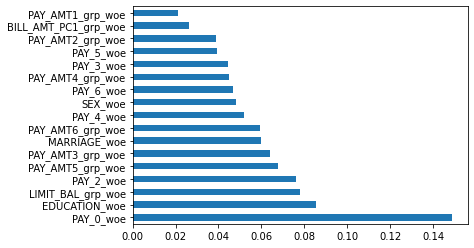

In [ ]:
rf = RandomForestClassifier(random_state = 24, n_jobs=-1)
rf.fit(x_train_woe, y_train.values.ravel())
dev = rf.predict_proba(x_train_woe)[:,1]
preds = rf.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))

feat_importances = pd.Series(rf.feature_importances_, index=x_train_woe.columns)
feat_importances.nlargest(18).plot(kind='barh')

### Baseline Support Vector Classifier

In [ ]:
svc = SVC(probability = True)
svc.fit(x_train_woe, y_train.values.ravel())
dev = svc.predict_proba(x_train_woe)[:,1]
preds = svc.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))

AUROC on training data:  0.7723638660473626
Somersd on training data:  SomersDResult(statistic=0.544727732094725, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))
AUROC on test data:  0.7136950275721323
Somersd on test data:  SomersDResult(statistic=0.4273900551442647, pvalue=1.980987937555094e-156, table=array([[0, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 1]]))


### Baseline Ada Boost Classifier

In [ ]:
abc = AdaBoostClassifier()
abc.fit(x_train_woe, y_train.values.ravel())
dev = abc.predict_proba(x_train_woe)[:,1]
preds = abc.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))

AUROC on training data:  0.7708322948400624
Somersd on training data:  SomersDResult(statistic=0.5416645896801249, pvalue=0.0, table=array([[1, 2, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 2, 2, 3]]))
AUROC on test data:  0.776991170100051
Somersd on test data:  SomersDResult(statistic=0.553982340200102, pvalue=0.0, table=array([[1, 5, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]]))


### Baseline Gradient Boosting Classifier

AUROC on training data:  0.78202032901171
Somersd on training data:  SomersDResult(statistic=0.5640406580234203, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))
AUROC on test data:  0.7858324559874109
Somersd on test data:  SomersDResult(statistic=0.5716649119748218, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))


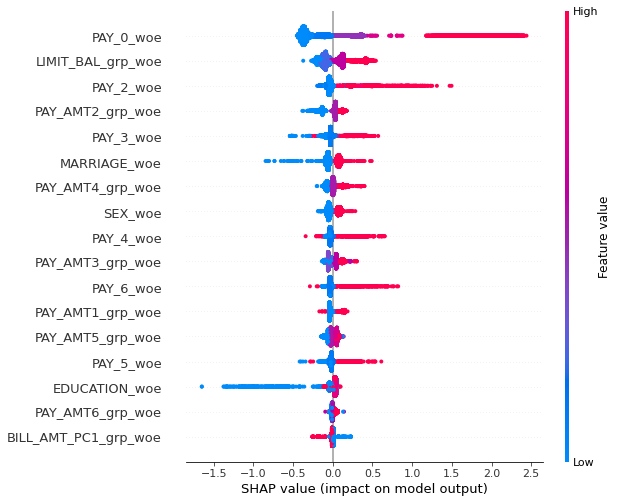

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_woe, y_train.values.ravel())
dev = gbc.predict_proba(x_train_woe)[:,1]
preds = gbc.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))

shap.initjs()
explainer = shap.TreeExplainer(gbc)
shap_values = explainer.shap_values(x_train_woe)
shap.summary_plot(shap_values, features=x_train_woe, feature_names=x_train_woe.columns)

### Baseline Extreme Gradient Boosting Classifier

AUROC on training data:  0.7820955398897513
Somersd on training data:  SomersDResult(statistic=0.5641910797795029, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))
AUROC on test data:  0.7843252162070938
Somersd on test data:  SomersDResult(statistic=0.5686504324141878, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))


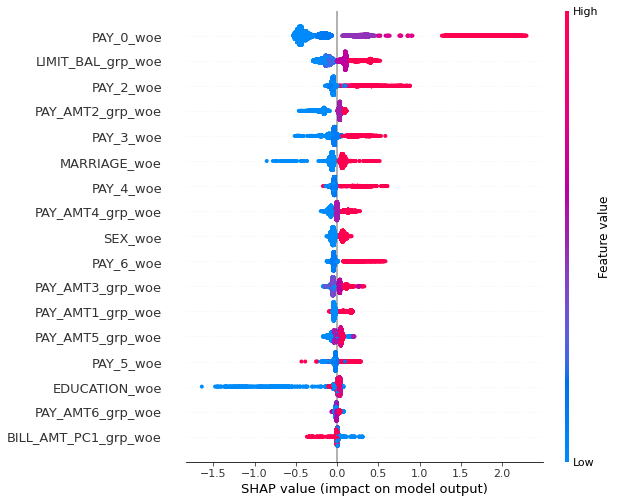

In [ ]:
xgb = XGBClassifier(random_state =24, n_jobs=-1)
xgb.fit(x_train_woe, y_train.values.ravel())
dev = xgb.predict_proba(x_train_woe)[:,1]
preds = xgb.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))

shap.initjs()
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_train_woe)
shap.summary_plot(shap_values, features=x_train_woe, feature_names=x_train_woe.columns)

### Baseline Soft Voting Classifier

In [ ]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. 
from sklearn.ensemble import VotingClassifier
soft_voting_clf = VotingClassifier(estimators =[('gnb',gnb),('lr',lr),('abc',abc),('gbc',gbc),('xgb',xgb)], voting = 'soft') 
soft_voting_clf.fit(x_train_woe, y_train.values.ravel())

dev = soft_voting_clf.predict_proba(x_train_woe)[:,1]
preds = soft_voting_clf.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))


AUROC on training data:  0.776543295530048
Somersd on training data:  SomersDResult(statistic=0.5530865910600961, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))
AUROC on test data:  0.7837340554952031
Somersd on test data:  SomersDResult(statistic=0.5674681109904062, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 2]]))


## Hyperparameter Tuning (Tuned Model Performance)
After getting the baselines, let's see if we can improve on the indivdual model results!I mainly used grid search to tune four of the models (Naive Bayes, Logistic Regression, Gradient Boosting Classifier and Soft Voting Classifier). 

The tuned model performance (in terms of AUROC and Somers' D) can be found in the table below:

| Tuned Model | AUROC | Somers' D |
| --- | --- | --- |
    | Naive Bayes | 77.58% | 55.16%|
    | Logistic regression | 77.71% | 55.43% |
    | Gradient boosting classifier| 78.58% | 57.17%  |
    | Soft voting classifier| 78.37% | 56.75%  |

In [ ]:
from sklearn.model_selection import GridSearchCV 

#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

### Tuned Gaussian Naive Bayes

In [ ]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [ ]:
clf_gnb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, verbose=1,scoring="roc_auc", cv=5, n_jobs=-1)
best_clf_gnb = clf_gnb.fit(x_train_woe,y_train.values.ravel())
clf_performance(best_clf_gnb,'Gaussian Naive Bayes')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Gaussian Naive Bayes
Best Score: 0.7623497282446815
Best Parameters: {'var_smoothing': 1.0}


In [ ]:
gnb = GaussianNB(var_smoothing=1.0)
gnb.fit(x_train_woe, y_train.values.ravel())
dev = gnb.predict_proba(x_train_woe)[:,1]
preds = gnb.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))

AUROC on training data:  0.7624134495742816
Somersd on training data:  SomersDResult(statistic=0.5248268991485633, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))
AUROC on test data:  0.7757995233832247
Somersd on test data:  SomersDResult(statistic=0.5515990467664494, pvalue=0.0, table=array([[0, 0, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 1]]))


### Tuned Logistic Regression 

In [ ]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1','l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['saga']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5,scoring="roc_auc", verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(x_train_woe,y_train.values.ravel())
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.7663375987627024
Best Parameters: {'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
lr = LogisticRegression(C=0.23357214690901212,max_iter = 2000,penalty='l2',solver='saga')
lr.fit(x_train_woe, y_train.values.ravel())
dev = lr.predict_proba(x_train_woe)[:,1]
preds = lr.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))

AUROC on training data:  0.767743769253399
Somersd on training data:  SomersDResult(statistic=0.535487538506798, pvalue=0.0, table=array([[2, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))
AUROC on test data:  0.7773823085150612
Somersd on test data:  SomersDResult(statistic=0.5547646170301226, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 2]]))


### Tuned Gradient Boosting Classifier

In order to narrow down the potential number of configurations used in the grid search, I chose to first loop through several values of each o the individual hyperparameters to see which value leads to the highest accuracy. I chose accuracy instead of the AUROC because the latter is somewhat irresponsive to changes in the values of the hyperparameters.

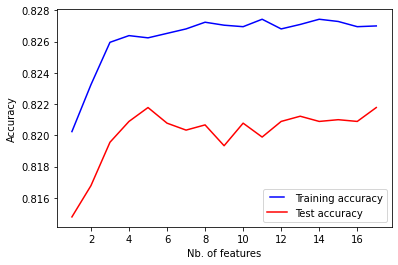

,Max. nb. of features,Training accuracy,Test accuracy
16,17,0.827000,0.821778
4,5,0.826238,0.821778
12,13,0.827095,0.821222
14,15,0.827286,0.821000
3,4,0.826381,0.820889


In [ ]:
import pandas as pd
from pandas import DataFrame

max_features = np.linspace(1, 17, 17, endpoint=True)

max_features = max_features.astype(int)
train_results = []
val_results = []
for max_nb_ft in max_features:
   gbc = GradientBoostingClassifier(random_state = 24,max_features=max_nb_ft).fit(x_train_woe, y_train.values.ravel())
   score_train=gbc.score(x_train_woe, y_train)
   score_val=gbc.score(x_test_woe, y_test)
   train_results.append(score_train)
   val_results.append(score_val)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Training accuracy")
line2, = plt.plot(max_features, val_results, 'r', label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Nb. of features')
plt.show()

max_features=DataFrame(max_features,columns=["Max. nb. of features"])
train_results=DataFrame(train_results,columns=["Training accuracy"])
val_results=DataFrame(val_results,columns=["Test accuracy"])
features_grid=max_features.join([train_results,val_results],on=None, how="left",sort=False)
features_grid_top5=features_grid.sort_values(by='Test accuracy', ascending=False).head(5)
features_grid_top5

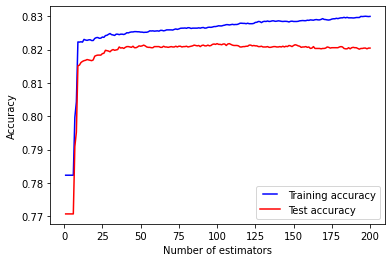

,Number of estimators,Training accuracy,Test accuracy
99,100,0.827000,0.821778
107,108,0.827381,0.821778
97,98,0.826905,0.821667
103,104,0.827238,0.821667
104,105,0.827333,0.821667


In [ ]:
import pandas as pd
from pandas import DataFrame


n_est = np.linspace(1, 200, 200, endpoint=True)
n_est = n_est.astype(int)

train_results = []
val_results = []
for estimator in n_est:
   gbc = GradientBoostingClassifier(random_state = 24,n_estimators=estimator,max_features=17).fit(x_train_woe, y_train.values.ravel())
   score_train=gbc.score(x_train_woe, y_train)
   score_val=gbc.score(x_test_woe, y_test)
   train_results.append(score_train)
   val_results.append(score_val)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_est, train_results, 'b', label="Training accuracy")
line2, = plt.plot(n_est, val_results, 'r', label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Number of estimators')
plt.show()

n_est=DataFrame(n_est,columns=["Number of estimators"])
train_results=DataFrame(train_results,columns=["Training accuracy"])
val_results=DataFrame(val_results,columns=["Test accuracy"])
features_grid=n_est.join([train_results,val_results],on=None, how="left",sort=False)
features_grid_top5=features_grid.sort_values(by='Test accuracy', ascending=False).head(5)
features_grid_top5

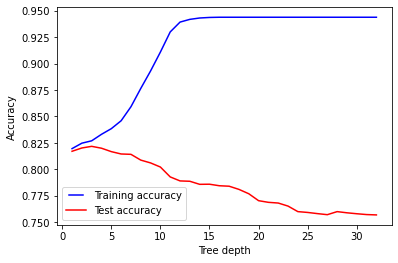

,Tree depth,Training accuracy,Test accuracy
2,3.0,0.827000,0.821778
1,2.0,0.824762,0.820222
3,4.0,0.833143,0.820000
0,1.0,0.819619,0.817111
4,5.0,0.838476,0.816778


In [ ]:
import pandas as pd
from pandas import DataFrame


max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
val_results = []
for max_depth in max_depths:
   gbc = GradientBoostingClassifier(random_state=24,max_depth=max_depth,max_features=17,n_estimators=100).fit(x_train_woe, y_train.values.ravel())
   score_train=gbc.score(x_train_woe, y_train)
   score_val=gbc.score(x_test_woe, y_test)
   train_results.append(score_train)
   val_results.append(score_val)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Training accuracy")
line2, = plt.plot(max_depths, val_results, 'r', label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

max_depths=DataFrame(max_depths,columns=["Tree depth"])
train_results=DataFrame(train_results,columns=["Training accuracy"])
val_results=DataFrame(val_results,columns=["Test accuracy"])
features_grid=max_depths.join([train_results,val_results],on=None, how="left",sort=False)
features_grid_top5=features_grid.sort_values(by='Test accuracy', ascending=False).head(5)
features_grid_top5

In [ ]:
param_grid = {"max_depth": [1,2,3,4],
              "n_estimators": [95,96,97,98,99,100],
              "learning_rate": [0.1,0.01,0.05,0.005],
              "max_features": [10,11,12,13,14,15,16,17]
             }

gbc_tuned = GradientBoostingClassifier()

# run grid search
clf_gbc = GridSearchCV(gbc_tuned, param_grid = param_grid, cv = 5,scoring="roc_auc", verbose = True, n_jobs = -1)
best_clf_gbc = clf_gbc.fit(x_train_woe,y_train.values.ravel())
clf_performance(best_clf_gbc,'Gradient Boosting Classifier')

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Gradient Boosting Classifier
Best Score: 0.7725355782483472
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 10, 'n_estimators': 98}


AUROC on training data:  0.7913247094721877
Somersd on training data:  SomersDResult(statistic=0.5826494189443753, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))
AUROC on test data:  0.7859897286262886
Somersd on test data:  SomersDResult(statistic=0.5719794572525773, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))


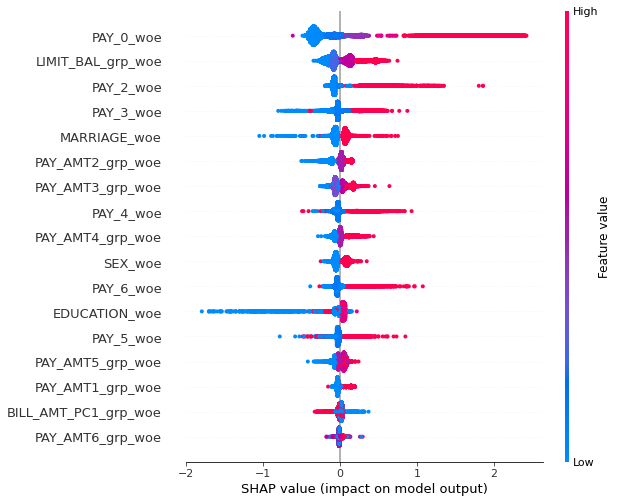

In [ ]:
gbc =  GradientBoostingClassifier(random_state=24,learning_rate=0.1,max_depth=4,max_features=10,n_estimators=98)
gbc.fit(x_train_woe, y_train.values.ravel())
dev = gbc.predict_proba(x_train_woe)[:,1]
preds = gbc.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))

shap.initjs()
explainer = shap.TreeExplainer(gbc)
shap_values = explainer.shap_values(x_train_woe)
shap.summary_plot(shap_values, features=x_train_woe, feature_names=x_train_woe.columns)

### Tuned Soft Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

best_gnb = best_clf_gnb.best_estimator_
best_lr = best_clf_lr.best_estimator_
best_gbc = best_clf_gbc.best_estimator_

voting_clf_soft = VotingClassifier(estimators = [('gnb',best_gnb),('lr',best_lr),('gbc',best_gbc)], voting = 'soft') 

#in a soft voting classifier you can weight some models more than others. I used a grid search to explore different weightings
#no new results here
params = {'weights' : [[1,2,3],[1,3,2],[3,2,1,],[2,3,1],[2,1,3],[3,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5,scoring="roc_auc", verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(x_train_woe,y_train.values.ravel())
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(x_train_woe)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
VC Weights
Best Score: 0.7723095480002877
Best Parameters: {'weights': [2, 1, 3]}


In [ ]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. 
from sklearn.ensemble import VotingClassifier
soft_voting_clf = VotingClassifier(estimators =[('gnb',best_gnb),('lr',best_lr),('gbc',best_gbc)], voting = 'soft',weights=[2, 1, 3]) 
soft_voting_clf.fit(x_train_woe, y_train.values.ravel())

dev = soft_voting_clf.predict_proba(x_train_woe)[:,1]
preds = soft_voting_clf.predict_proba(x_test_woe)[:,1]

print('AUROC on training data: ', roc_auc_score(y_train["default.payment.next.month"].values, dev))
print('Somersd on training data: ', somersd(y_train["default.payment.next.month"].values, dev))
print('AUROC on test data: ', roc_auc_score(y_test["default.payment.next.month"].values, preds))
print('Somersd on test data: ', somersd(y_test["default.payment.next.month"].values, preds))


AUROC on training data:  0.7836316178915668
Somersd on training data:  SomersDResult(statistic=0.5672632357831336, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))
AUROC on test data:  0.7863955709677852
Somersd on test data:  SomersDResult(statistic=0.5727911419355703, pvalue=0.0, table=array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]]))


## Conclusion

The model that performs the best with WOE encodings is the Soft Voting Classifier based on the Gaussian Naive Bayes, Logistic Regression and Gradient Boosting Classifier after hyperparameter tuning. The Gradient Boosting Classifier is the second best performing algorithm. According to the Shapley values afferent to the tuned Gradient Boosting Classifier, the repayment status in September 2005 (PMT_0; the most recent time series) has the strongest effect (increase) on the probability that the client defaults the following month whereas the education level variable decreases the default probability with the increase in the level of education. The effect of the repayment status variable sharply decreases with the distance in time (the earlier months affect the default proability to a lesser extent). So far, the influence each of the features has on the default probability is more or less as I initially expected.